Refer the article

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

**WORD EMBEDDINGS**

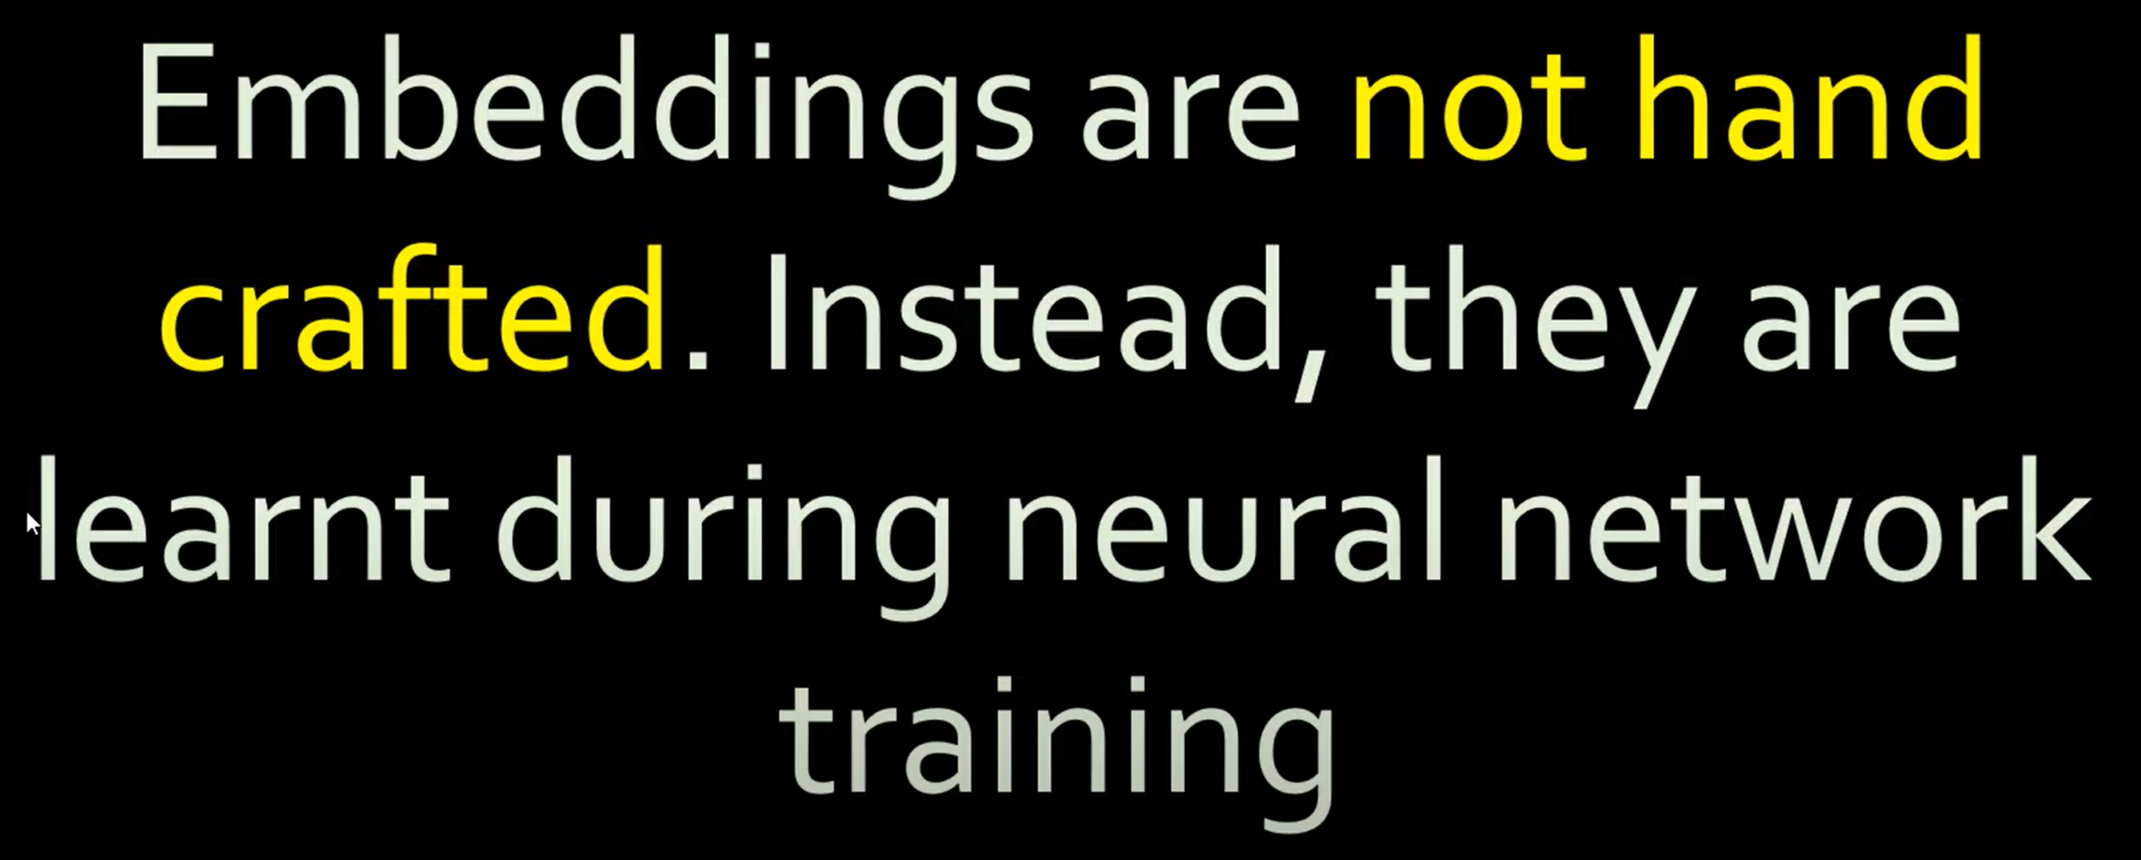

Word Embeddings are calculated using two techniques:
1. Supervised Word Embeddings
2. Self Supervised Word Embeddings

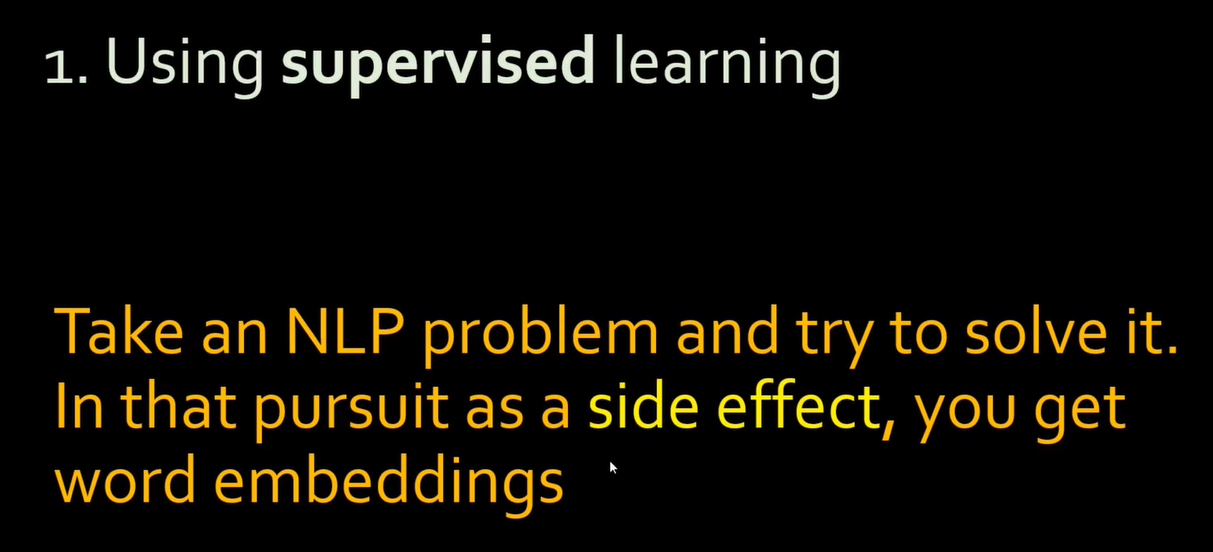

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [3]:
reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

The one_hot function takes the sentence and vocab size and returns the unique numbers against the words in the sentence. The vocab size decides the unique numbers between the range of 1 to vocab size

In [6]:
one_hot('amazing restaurant',30)

[14, 14]

In [8]:
vocab_size = 40
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
encoded_reviews

[[15, 26],
 [31, 25],
 [19, 3],
 [13, 36, 2],
 [23, 3, 32],
 [19, 26],
 [13, 3, 29],
 [9, 20],
 [9, 14],
 [33, 26]]

**padding** argument in the function means where to pad. **Post** means to pad at the end of the sentence

In [10]:
max_length = 3
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
padded_reviews

array([[15, 26,  0],
       [31, 25,  0],
       [19,  3,  0],
       [13, 36,  2],
       [23,  3, 32],
       [19, 26,  0],
       [13,  3, 29],
       [ 9, 20,  0],
       [ 9, 14,  0],
       [33, 26,  0]])

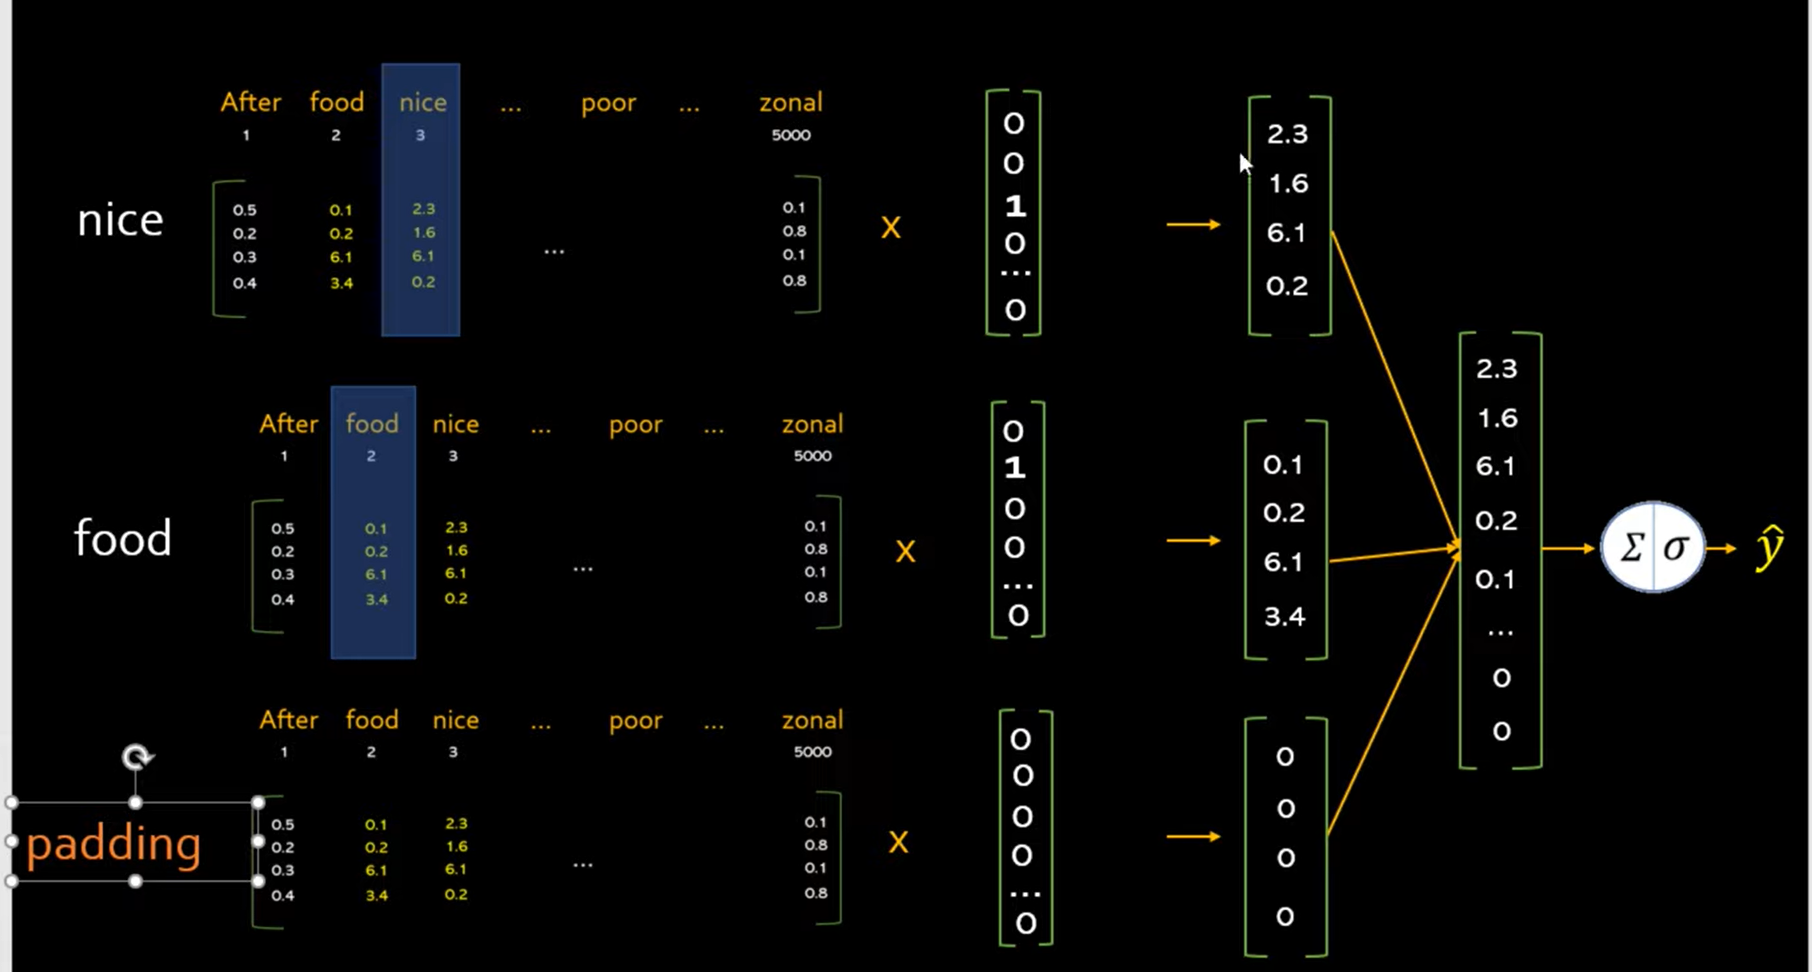

In [28]:
embedded_vector_size = 4

model = Sequential()
model.add(Embedding(vocab_size,embedded_vector_size,input_length=max_length,name='Embedding'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

C:\Users\ebrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
X = padded_reviews
Y = sentiment

In [32]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Embedding (Embedding)           │ (None, 3, 4)           │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173 (692.00 B)

 Trainable params: 173 (692.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
model.fit(X, Y, epochs=50, verbose=0)

In [33]:
loss, accuracy = model.evaluate(X, Y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.9000 - loss: 0.6563


0.8999999761581421

In [34]:
weights = model.get_layer('Embedding').get_weights()[0]
len(weights)

40

weights length is 40 because my vocab size is 40

In [35]:
weights[13]

array([-0.00478132,  0.01280162, -0.03605947, -0.00253311], dtype=float32)

In [36]:
weights[4]

array([-0.03702106, -0.04899324, -0.01282002, -0.01858594], dtype=float32)

In [37]:
weights[16]

array([ 0.01820102, -0.00442145, -0.04591238, -0.00069413], dtype=float32)